In [206]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.cm import get_cmap
import numpy as np
import os
import math
cwd = '/home/ete/randy-rover-bitch-boy-fresh-man-alpha-group-data-science-markov-chain-soon-to-b-binary-cross-entropy/simulation_ws/src/rl-agent/markov/environments'
version = 'init'
unitToPixel = 35.7
ORIGIN = [2060, 867]

In [198]:
def getCoords(episode, run):
    coords = np.load(os.path.join(cwd, 'outputs', version , episode, run, 'coordinates.npy'))
    actualLen = 0
    for x in coords:
        if x[0] == 0:
            break
        actualLen += 1
    coords = coords[:actualLen]
    for x in range(len(coords)):
        coords[x] = [coords[x][0]*unitToPixel+ORIGIN[0], coords[x][1]*unitToPixel+ORIGIN[1]]
    
    return np.transpose(coords)

In [199]:
def genunits(x, dx, y, dy):
    stepx = (dx - x ) / 10
    posx = np.arange(x, dx, step=stepx)
    unitsx = []
    for x in posx:
        unitsx.append(round((ORIGIN[0] - x) / unitToPixel, 2))
    stepy = (dy - y )/ 10
    posy = np.arange(y, dy, step=stepy)
    unitsy = []
    for y in posy:
        unitsy.append(round((y - ORIGIN[1]) / unitToPixel, 2))
        
    return (posx, unitsx, posy, unitsy)


In [200]:
def genGraph(x, dx, y, dy,episode, run):
    run = str(run)
    if ((dx - x) / (dy - y) > 2):
        row = 2
        column = 1
    else:
        row = 1
        column = 2
    fig = plt.figure(figsize = (30, 15))
    im = plt.imread("bg.png")
    coords = getCoords(episode, run)
    imgrange = [0, 2584, 0, 1894]
    
    fig.add_subplot(row, column, 1)
    implot = plt.imshow(im, extent=imgrange)
    plt.ylim((y, dy))
    plt.xlim((x, dx))    
    plt.scatter([ORIGIN[0]], [ORIGIN[1]], c='k', s=2)
    plt.scatter(x=coords[0], y=coords[1], c="g", s=3)
    
    
    fig.add_subplot(row , column,  2)
    implot = plt.imshow(im, extent=imgrange)
    plt.ylim((y, dy))
    plt.xlim((x, dx))   
    posx, unitsx, posy, unitsy = genunits(x, dx, y, dy)
    plt.xticks(posx, unitsx)
    plt.yticks(posy, unitsy)
    plt.scatter([ORIGIN[0]], [ORIGIN[1]], c='k', s=2)
    plt.scatter(x=coords[0], y=coords[1], c="g", s=3)
    
    plt.show()

    

In [274]:
def genMultiGraph(x, dx, y, dy, episode):
    cmap = get_cmap('plasma')
    totalRuns = len(os.listdir(os.path.join(cwd, 'outputs', version, episode)))
    if ((dx - x) / (dy - y) > 2):
        row = 2
        column = 1
    else:
        row = 1
        column = 2
    fig = plt.figure(figsize = (40, 15))
    im = plt.imread("bg.png")
    coords = getCoords(episode, '0')
    imgrange = [0, 2584, 0, 1894]
    
    fig.add_subplot(row, column, 1)
    implot = plt.imshow(im, extent=imgrange)
    plt.ylim((y, dy))
    plt.xlim((x, dx))    
    plt.scatter([ORIGIN[0]], [ORIGIN[1]], c='k', s=4)
    
    
    for i in range(totalRuns):
            coords = getCoords(episode, str(i))
#             plt.scatter(x=coords[0], y=coords[1], marker='X', c=[list(cmap(x/totalRuns))], s=3)
            plt.plot(coords[0], coords[1], marker='o', linestyle='-', c=cmap(i/totalRuns/1.3), linewidth=1, markersize=3)
    
    
    fig.add_subplot(row , column,  2)
    implot = plt.imshow(im, extent=imgrange)
    
    plt.ylim((y, dy))
    plt.xlim((x, dx))   
    posx, unitsx, posy, unitsy = genunits(x, dx, y, dy)
    plt.xticks(posx, unitsx)
    plt.yticks(posy, unitsy)
    plt.scatter([ORIGIN[0]], [ORIGIN[1]], c='k', s=4)
    for i in range(totalRuns):
        coords = getCoords(episode, str(i))
#             plt.scatter(x=coords[0], y=coords[1], marker='X', c=[list(cmap(x/totalRuns))], s=3)
        plt.plot(coords[0], coords[1], marker='o', linestyle='-', c=cmap(i/totalRuns/1.3), linewidth=1, markersize=3)


    
    plt.show()

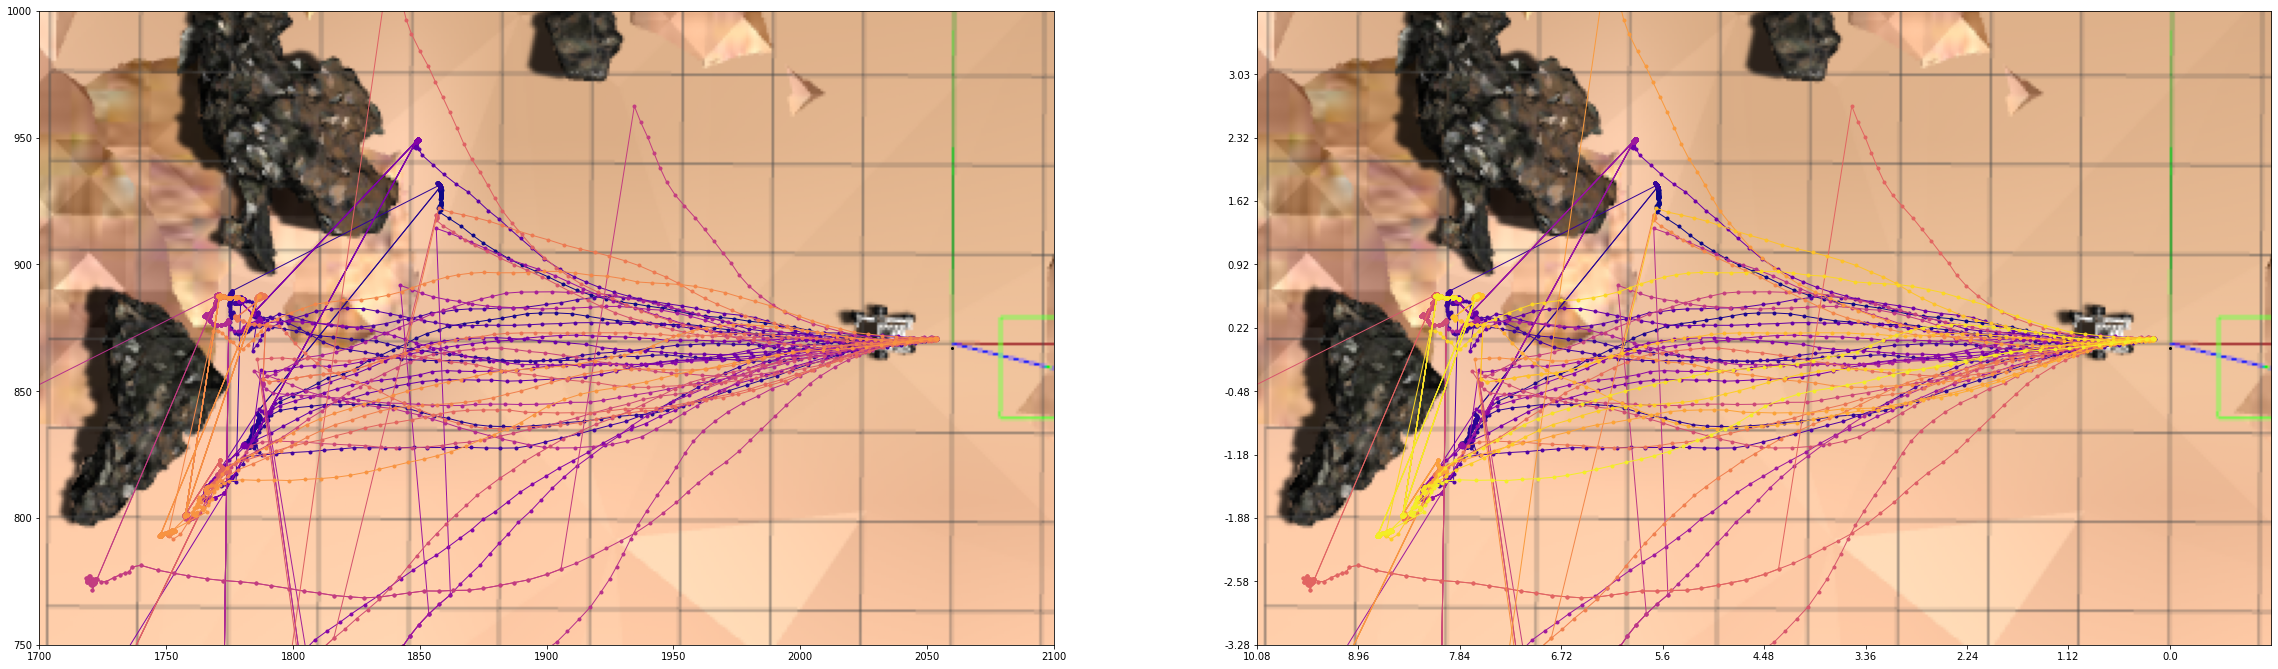

In [275]:
genMultiGraph(1700, 2100, 750, 1000, '2')

#for x in range(len(os.listdir(os.path.join(cwd, 'outputs', version, '2')))):
#    genGraph(1800, 2100, 750, 1000, '2', x)

In [227]:
cmap = get_cmap('plasma')
np.array(list(cmap(0)))

array([0.050383, 0.029803, 0.527975, 1.      ])